In [1]:
import csv
import matplotlib
# import seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
import scipy.stats as ss
from matplotlib import style
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 4)
import pandas as pd

from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn

plt.style.context("seaborn-whitegrid")
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25


visualize all cnvs in one plot

In [2]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/Cervical_124_patients_adjusted/cnv_files_for_acen_removal.txt'
df1 = pd.read_csv(f1, sep='\t', header=None, comment='#')
df1.columns = ['patient', 'seg_path']
assert df1.shape[0] == 123
df1.head(2)

,patient,seg_path
0,HTMCP-03-06-02001,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...
1,HTMCP-03-06-02002,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...


In [3]:
df2 = pd.DataFrame()
for idx, row in df1.iterrows():
    pat = row['patient']
    seg_file = row['seg_path']
#     print(pat, seg_file)
    # cnv_files, some rows have 10 columns instead of 9, problems from the APLcnv pipeline
    cnv = pd.read_csv(seg_file, sep='\t',  error_bad_lines=False, warn_bad_lines=True)
    cnv.columns = ['chr', 'start', 'end', 'cn']
    cnv = cnv[cnv.cn != 2]
    cnv['patient'] = pat
    if df2.empty:
        df2 = cnv
    else: df2 = pd.concat([df2,cnv])

In [4]:
df2.head(2)

,chr,start,end,cn,patient
0,1,416575,564606,4,HTMCP-03-06-02001
1,1,564607,569345,1,HTMCP-03-06-02001


In [5]:
df2.shape

(49750, 5)

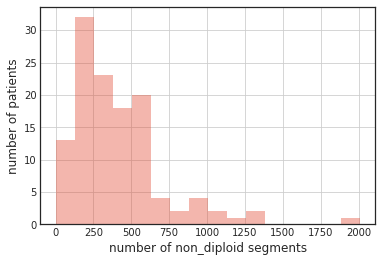

In [6]:
# non-diploid segments distribution by patient
segments = df2.groupby('patient').count().sort_values('cn', ascending=False)['cn']

# distribution of number of segments
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.distplot(segments, kde=False)
    plt.xlabel('number of non_diploid segments')
    plt.ylabel('number of patients')

In [7]:
# patients with exactly the same cnv breakpoints
df2.groupby(['chr', 'start', 'end']).count().sort_values('patient', ascending=False).head(2)

,,,cn,patient
chr,start,end,,
16,46391125,46391604,3,3
2,92316257,92318263,2,2


In [8]:
df2.head(2)

,chr,start,end,cn,patient
0,1,416575,564606,4,HTMCP-03-06-02001
1,1,564607,569345,1,HTMCP-03-06-02001


In [9]:
# of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/amps.txt'
# df2[df2.cn >2].to_csv(of, index=False, header=None, sep='\t')

In [17]:
patients = df2.patient.value_counts().index.tolist()

In [11]:
# 1 patient has no cnv?
len(patients)

122

In [12]:
# plot chromosomes
f3 = '/home/szong/projects/resource/hg19_cytoband_ucsc.txt'
df3 = pd.read_csv(f3, header=None, sep='\t')
df3.columns = ['chr', 'start', 'end', 'cytoband', 'comments']
df3.head(2)

,chr,start,end,cytoband,comments
0,1,0,2300000,p36.33,gneg
1,1,2300000,5400000,p36.32,gpos25


In [13]:
# patients = ['HTMCP-03-06-02071', 'HTMCP-03-06-02330', 'HTMCP-03-06-02441']

In [19]:
patients

['HTMCP-03-06-02109',
 'HTMCP-03-06-02157',
 'HTMCP-03-06-02239',
 'HTMCP-03-06-02151',
 'HTMCP-03-06-02202',
 'HTMCP-03-06-02074',
 'HTMCP-03-06-02235',
 'HTMCP-03-06-02175',
 'HTMCP-03-06-02344',
 'HTMCP-03-06-02435',
 'HTMCP-03-06-02194',
 'HTMCP-03-06-02326',
 'HTMCP-03-06-02068',
 'HTMCP-03-06-02205',
 'HTMCP-03-06-02155',
 'HTMCP-03-06-02215',
 'HTMCP-03-06-02148',
 'HTMCP-03-06-02195',
 'HTMCP-03-06-02003',
 'HTMCP-03-06-02103',
 'HTMCP-03-06-02176',
 'HTMCP-03-06-02203',
 'HTMCP-03-06-02156',
 'HTMCP-03-06-02058',
 'HTMCP-03-06-02354',
 'HTMCP-03-06-02020',
 'HTMCP-03-06-02089',
 'HTMCP-03-06-02209',
 'HTMCP-03-06-02170',
 'HTMCP-03-06-02047',
 'HTMCP-03-06-02046',
 'HTMCP-03-06-02322',
 'HTMCP-03-06-02238',
 'HTMCP-03-06-02099',
 'HTMCP-03-06-02054',
 'HTMCP-03-06-02057',
 'HTMCP-03-06-02152',
 'HTMCP-03-06-02260',
 'HTMCP-03-06-02346',
 'HTMCP-03-06-02006',
 'HTMCP-03-06-02085',
 'HTMCP-03-06-02063',
 'HTMCP-03-06-02447',
 'HTMCP-03-06-02214',
 'HTMCP-03-06-02040',
 'HTMCP-03

In [ ]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/amps_bins_1kb.txt'
df = pd.read_csv(f, sep='\t', header=None)
df.columns = ['bin_chr', 'bin_start', 'bin_end', 'chr', 'start', 'end', 'cn', 'patient']#, 'length']
occurrence = df.groupby(['bin_chr', 'bin_start', 'bin_end']).nunique()['patient']#.sort_values(ascending=False)
recur_amps = occurrence.reset_index().sort_values(['bin_chr', 'bin_start', 'bin_end'])
recur_amps.head()

In [27]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/amps_bins_1kb_patients.txt'
recur_amps.to_csv(f, index=False, sep='\t')

In [ ]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/dels_bins_1kb.txt'
df = pd.read_csv(f, sep='\t', header=None)
df.columns = ['bin_chr', 'bin_start', 'bin_end', 'chr', 'start', 'end', 'cn', 'patient']#, 'length']
df = df[['bin_chr', 'bin_start', 'bin_end','patient']]
occurrence = df.groupby(['bin_chr', 'bin_start', 'bin_end']).nunique()['patient']#.sort_values(ascending=False)
recur_dels = occurrence.reset_index().sort_values(['bin_chr', 'bin_start', 'bin_end'])

In [28]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/dels_bins_1kb_patients.txt'
recur_dels.to_csv(f, index=False, sep='\t')


processing chr 1 and the chr_offset is 0
plotting amp aggregation


/projects/da_workspace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/projects/da_workspace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


plotting del aggregation
processing chr 2 and the chr_offset is 249250621
plotting amp aggregation
plotting del aggregation
processing chr 3 and the chr_offset is 492449994
plotting amp aggregation
plotting del aggregation
processing chr 4 and the chr_offset is 690472424
plotting amp aggregation
plotting del aggregation
processing chr 5 and the chr_offset is 881626700
plotting amp aggregation
plotting del aggregation
processing chr 6 and the chr_offset is 1062541960
plotting amp aggregation
plotting del aggregation
processing chr 7 and the chr_offset is 1233657027
plotting amp aggregation
plotting del aggregation
processing chr 8 and the chr_offset is 1392795690
plotting amp aggregation
plotting del aggregation
processing chr 9 and the chr_offset is 1539159712
plotting amp aggregation
plotting del aggregation
processing chr 10 and the chr_offset is 1680373143
plotting amp aggregation
plotting del aggregation
processing chr 11 and the chr_offset is 1815907890
plotting amp aggregation
pl

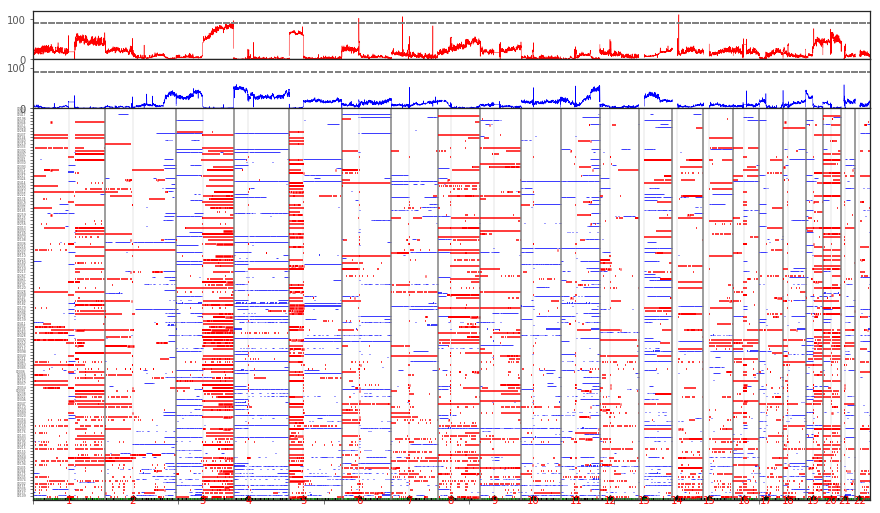

In [65]:
# new code 20180606
df_segs = df2.copy()
# fig = plt.figure(figsize=with plt.style.context("seaborn-white"):
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
#     fig = plt.figure(facecolor='w', figsize=(15,9))
fig = plt.figure(figsize=(15, 9), facecolor='white')
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1,8],
                       wspace=0.05, # horizontal space
                       hspace=0.0  # vertical space
                      )

ax0 = fig.add_subplot(gs[0], facecolor='white')
ax1 = fig.add_subplot(gs[1], facecolor='white')
ax2 = fig.add_subplot(gs[2], facecolor='white')
chr_offset = 0 # chromosome offset
num_patients = len(patients)
#     ylim = 4
ylim = num_patients/10.0+0.1
for chr in np.arange(1,23):
    print('processing chr {0} and the chr_offset is {1}'.format(chr, chr_offset))
    dfchr = df_cytoband[df_cytoband.chr=='{}'.format(chr)]
    clrs = ['-k', '-g']*100

    num_segs = dfchr.shape[0]
    # plot centromere
    acen = dfchr[dfchr.comments=='acen'].reset_index().loc[0, 'end'] + chr_offset
    ax2.plot(acen, 0.1, color='black',marker='D', markersize=4)
    ax2.axvline(x=acen, color='gray', linewidth=0.2)
    ax2.text(acen, -.25, '{}'.format(chr), color='red', horizontalalignment='center')

    clrs = clrs[:num_segs]
    i = 0 # color index
    for idx, row in dfchr.iterrows():
        start = row.start + chr_offset
        end = row.end + chr_offset
        cytoband = row.cytoband
        comment = row.comments
        center = (start + end)/2 + chr_offset
        width = int(end - start)
        ax2.plot((start, end), (0.05,0.05), clrs[i], linewidth=3, solid_capstyle='butt')        
        i+=1


    # draw chromosome boundary
    ax2.axvline(x=chr_offset, color='gray')


    # plot amp aggregate results
    amps = recur_amps.query('bin_chr == {0}'.format(chr))
    print('plotting amp aggregation')
    amps['x'] = amps.bin_start + chr_offset
    ax0.plot(amps.x, amps.patient, color='red', linewidth=.5, solid_capstyle='butt')
    ax0.axhline(y=0.75*num_patients, color='gray', linestyle='dashed')

    # plot del aggregate results
    dels = recur_dels.query('bin_chr == {0}'.format(chr))
    print('plotting del aggregation')
    dels['x'] = dels.bin_start + chr_offset
    ax1.plot(dels.x, dels.patient, color='blue', linewidth=.5, solid_capstyle='butt')
    ax1.axhline(y=0.75*num_patients, color='gray', linestyle='dashed')


    # plot cnvs
    j = 0 # row offset
    yticks = []
    cnvy_coords = []
    for patient in patients: 
#             print('plotting patient {0}, cnvy_coords is {1}'.format(patient, 0.2+j))
        # plot amplification
        amps = df_segs.query('chr == {0} & patient == "{1}" & cn > 2'.format(chr, patient))
        m=0 #test label offset to be deleted
        for idx, row in amps.iterrows():
            start = row.start + chr_offset
            end = row.end + chr_offset
            length = end - start
            cn = row.cn
#                 if chr == 7 or chr ==14:
#                     print('plotting amps line {0}:{1}-{2}, cn {3}, length {4}'.format(chr, row.start, row.end, cn, row.end-row.start))


#                 it looks like can not see anything <150000 on a 3 billion scale, so magnfiy anything to 150000
#             if length < 150000:
# #                 end = start + 150000
#                 print('{0} {1} has a amp < 150kb {2}: {3}: {4}'.format(patient, chr, start, end-start, cn))
            ax2.plot((start, end), (0.2+j, 0.2+j), color='red',  linewidth=cn*0.5, solid_capstyle='butt')
#                 ax2.text(start, 0.2+m, str(row.start))
#                 m+=0.2
        # plot deletion
        dels = df_segs.query('chr == {0} & patient == "{1}" & cn < 2'.format(chr, patient))
        for idx, row in dels.iterrows():
            start = row.start + chr_offset
            end = row.end + chr_offset
            length = end - start
            cn = row.cn
#             if length < 150000:
# #                 end = start + 150000
#                 print('{0} {1} has a del < 150kb {2}'.format(patient, chr, start))
            del_w = 2 - cn
            ax2.plot((start, end), (0.3+j, 0.3+j), color='blue', linewidth=del_w*0.75, solid_capstyle='butt')
        yticks.append(0.25+j)
        j+=0.2
    chr_offset+=max(dfchr.end)
ax0.set_xlim(0, chr_offset)
ax0.set_ylim(0, num_patients)
ax1.set_xlim(0, chr_offset)
ax1.set_ylim(0, num_patients)
ax2.set_xlim(0, chr_offset)
ax2.set_ylim(0, ylim)
ax0.set_xticklabels('')
ax1.set_xticklabels('')
ax2.set_xticklabels('')
ax2.set_yticks(yticks)
ax2.set_yticklabels([i.split('-')[3] for i in patients], fontsize=3)
#     plt.tight_layout()
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/cnv_123_patients_test.png'
plt.savefig(of, dpi=800)
plt.show()#(15, 9), facecolor='white')

    

SyntaxError: invalid syntax (<ipython-input-82-cc84e79ee737>, line 1)

In [2]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/pog_cnv/amps_bins_1kb_patients.txt'
df1 = pd.read_csv(f1, sep='\t')
df1.head(2)

,bin_chr,bin_start,bin_end,patient
0,1,39001,40000,2
1,1,40001,41000,2


processing chr 1 and the chr_offset is 0
plotting amp aggregation


/projects/da_workspace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/projects/da_workspace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


plotting del aggregation
processing chr 2 and the chr_offset is 249250621
plotting amp aggregation
plotting del aggregation
processing chr 3 and the chr_offset is 492449994
plotting amp aggregation
plotting del aggregation
processing chr 4 and the chr_offset is 690472424
plotting amp aggregation
plotting del aggregation
processing chr 5 and the chr_offset is 881626700
plotting amp aggregation
plotting del aggregation
processing chr 6 and the chr_offset is 1062541960
plotting amp aggregation
plotting del aggregation
processing chr 7 and the chr_offset is 1233657027
plotting amp aggregation
plotting del aggregation
processing chr 8 and the chr_offset is 1392795690
plotting amp aggregation
plotting del aggregation
processing chr 9 and the chr_offset is 1539159712
plotting amp aggregation
plotting del aggregation
processing chr 10 and the chr_offset is 1680373143
plotting amp aggregation
plotting del aggregation
processing chr 11 and the chr_offset is 1815907890
plotting amp aggregation
pl

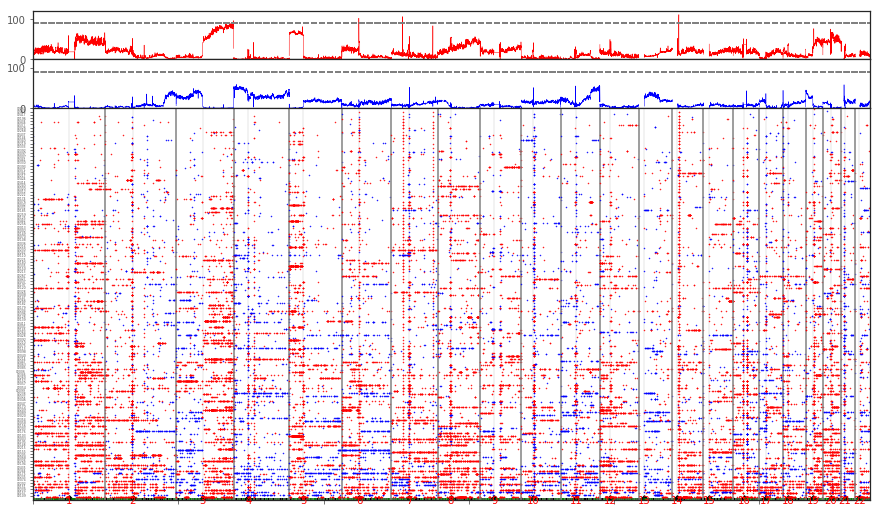

In [122]:
# new code 20180606 this is only to plot segments <1mb, not showing the cn or seg length, only +
df_segs = df2.copy()
# fig = plt.figure(figsize=with plt.style.context("seaborn-white"):
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
#     fig = plt.figure(facecolor='w', figsize=(15,9))
fig = plt.figure(figsize=(15, 9), facecolor='white')
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1,8],
                       wspace=0.05, # horizontal space
                       hspace=0.0  # vertical space
                      )

ax0 = fig.add_subplot(gs[0], facecolor='white')
ax1 = fig.add_subplot(gs[1], facecolor='white')
ax2 = fig.add_subplot(gs[2], facecolor='white')
chr_offset = 0 # chromosome offset
num_patients = len(patients)
#     ylim = 4
ylim = num_patients/10.0+0.1
for chr in np.arange(1,23):
    print('processing chr {0} and the chr_offset is {1}'.format(chr, chr_offset))
    dfchr = df_cytoband[df_cytoband.chr=='{}'.format(chr)]
    clrs = ['-k', '-g']*100

    num_segs = dfchr.shape[0]
    # plot centromere
    acen = dfchr[dfchr.comments=='acen'].reset_index().loc[0, 'end'] + chr_offset
    ax2.plot(acen, 0.1, color='black',marker='D', markersize=4)
    ax2.axvline(x=acen, color='gray', linewidth=0.2)
    ax2.text(acen, -.25, '{}'.format(chr), color='red', horizontalalignment='center')

    clrs = clrs[:num_segs]
    i = 0 # color index
    for idx, row in dfchr.iterrows():
        start = row.start + chr_offset
        end = row.end + chr_offset
        cytoband = row.cytoband
        comment = row.comments
        center = (start + end)/2 + chr_offset
        width = int(end - start)
        ax2.plot((start, end), (0.05,0.05), clrs[i], linewidth=3, solid_capstyle='butt')        
        i+=1


    # draw chromosome boundary
    ax2.axvline(x=chr_offset, color='gray')


    # plot amp aggregate results
    amps = recur_amps.query('bin_chr == {0}'.format(chr))
    print('plotting amp aggregation')
    amps['x'] = amps.bin_start + chr_offset
    ax0.plot(amps.x, amps.patient, color='red', linewidth=.5, solid_capstyle='butt')
    ax0.axhline(y=0.75*num_patients, color='gray', linestyle='dashed')

    # plot del aggregate results
    dels = recur_dels.query('bin_chr == {0}'.format(chr))
    print('plotting del aggregation')
    dels['x'] = dels.bin_start + chr_offset
    ax1.plot(dels.x, dels.patient, color='blue', linewidth=.5, solid_capstyle='butt')
    ax1.axhline(y=0.75*num_patients, color='gray', linestyle='dashed')


    # plot cnvs
    j = 0 # row offset
    yticks = []
    cnvy_coords = []
    for patient in patients: 
#             print('plotting patient {0}, cnvy_coords is {1}'.format(patient, 0.2+j))
        # plot amplification
        amps = df_segs.query('chr == {0} & patient == "{1}" & cn > 2'.format(chr, patient))
        m=0 #test label offset to be deleted
        for idx, row in amps.iterrows():
            start = row.start + chr_offset
            end = row.end + chr_offset
            length = end - start
            cn = row.cn
#                 if chr == 7 or chr ==14:
#                     print('plotting amps line {0}:{1}-{2}, cn {3}, length {4}'.format(chr, row.start, row.end, cn, row.end-row.start))


#                 it looks like can not see anything <150000 on a 3 billion scale, so magnfiy anything to 150000
            if length < 1e6:
                pos = 0.5*(start + end)
#                 end = start + 150000
#                 print('{0} {1} has a amp < 150kb {2}: {3}: {4}'.format(patient, chr, pos, end-start, cn))
                ax2.plot(pos, 0.2+j, color='red', marker='.', markersize=1)# solid_capstyle='butt')
#                 ax2.text(start, 0.2+m, str(row.start))
#                 m+=0.2
        # plot deletion
        dels = df_segs.query('chr == {0} & patient == "{1}" & cn < 2'.format(chr, patient))
        for idx, row in dels.iterrows():
            start = row.start + chr_offset
            end = row.end + chr_offset
            length = end - start
            cn = row.cn
            if length < 1e6:
                pos = 0.5*(start + end)
#                 end = start + 150000
#                 print('{0} {1} has a del < 150kb {2}'.format(patient, chr, start))
                del_w = 2 - cn
                ax2.plot(pos, 0.3+j, color='blue', marker='.', markersize=1)
        yticks.append(0.25+j)
        j+=0.2
    chr_offset+=max(dfchr.end)
ax0.set_xlim(0, chr_offset)
ax0.set_ylim(0, num_patients)
ax1.set_xlim(0, chr_offset)
ax1.set_ylim(0, num_patients)
ax2.set_xlim(0, chr_offset)
ax2.set_ylim(0, ylim)
ax0.set_xticklabels('')
ax1.set_xticklabels('')
ax2.set_xticklabels('')
ax2.set_yticks(yticks)
ax2.set_yticklabels([i.split('-')[3] for i in patients], fontsize=3)
#     plt.tight_layout()
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/cnv_123_patients_test.png'
plt.savefig(of, dpi=800)
plt.show()#(15, 9), facecolor='white')

    